![student-performance.png](attachment:fef8ce32-57a0-43d2-aaf3-92bda5223542.png)

# Student Performance Prediction

## Dataset exploration & Storing

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("student-mat.csv", sep = ';')

In [ ]:
print(df.shape)

(395, 33)


In [ ]:
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
print(df.head(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
print(df.info())          # Data types, non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
print(df.isnull().sum())  # Total nulls in each column

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


## Exploratory Data Analysis (EDA)
We begin by visualizing the distribution of final grades and exploring the relationship between key features (such as study time, failures, and parental education) and student performance.

### Grade Distribution (G3)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import seaborn as sns

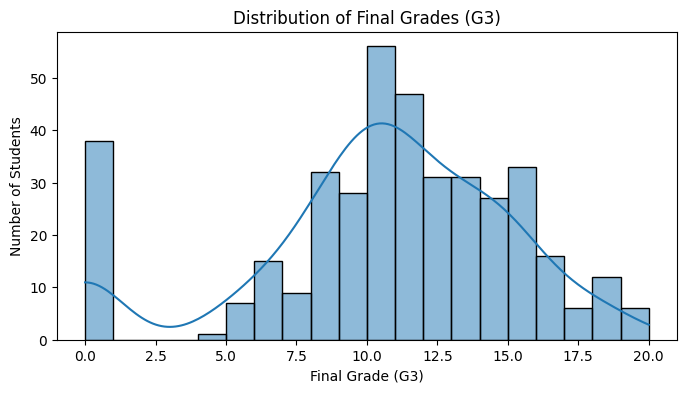

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.show()


### Pass or Fail dirstribution

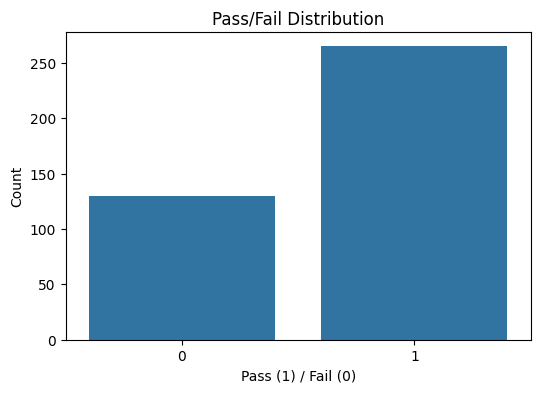

pass
1    265
0    130
Name: count, dtype: int64


In [ ]:
df['pass'] = (df['G3'] >= 10).astype(int)

plt.figure(figsize=(6, 4))
sns.countplot(x='pass', data=df)
plt.title('Pass/Fail Distribution')
plt.xlabel('Pass (1) / Fail (0)')
plt.ylabel('Count')
plt.show()

print(df['pass'].value_counts())


### Correlation matrix

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


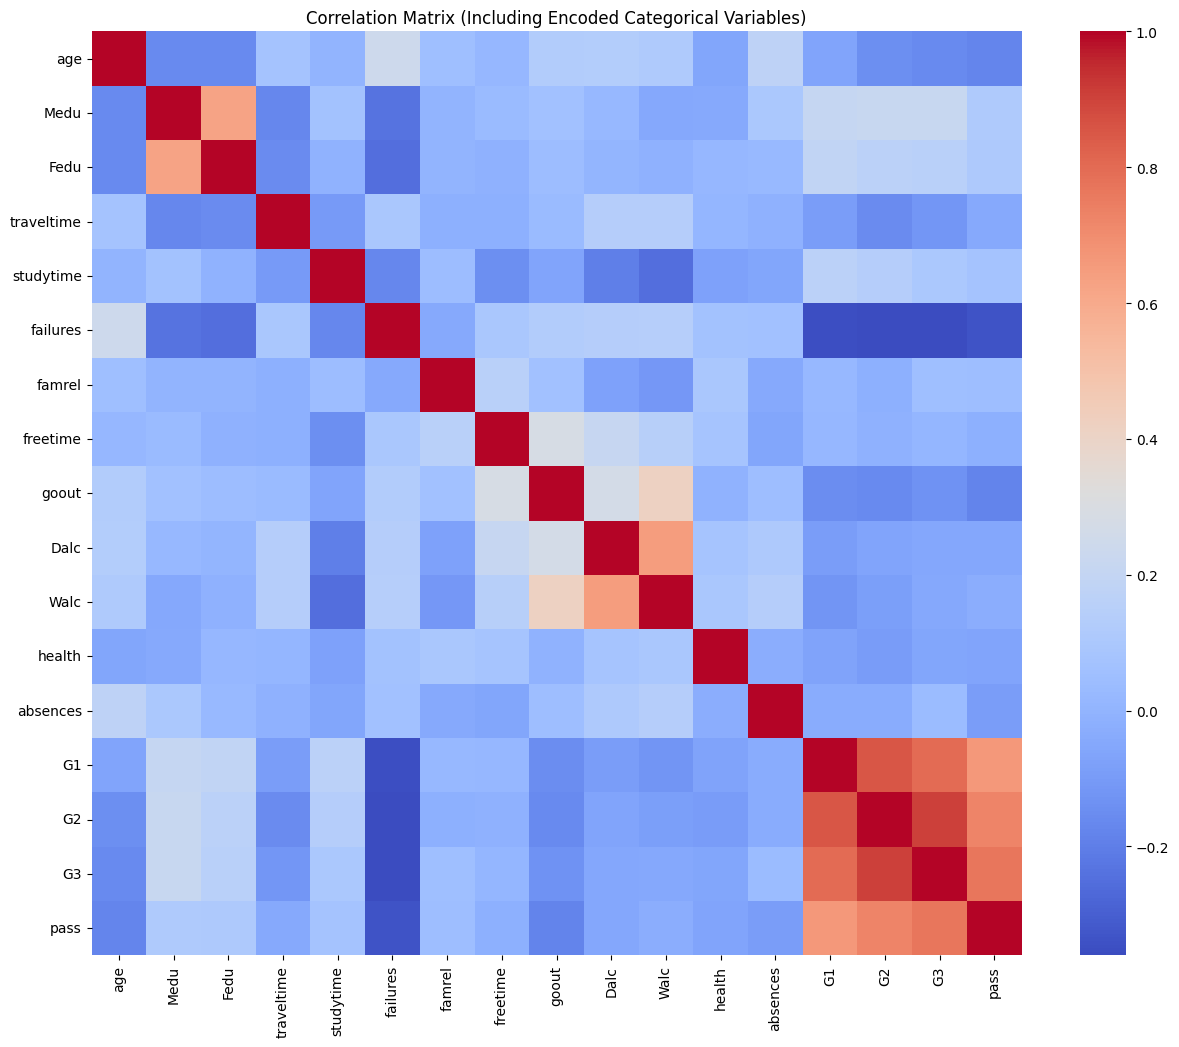

In [ ]:
numeric_encoded_df = df_encoded.select_dtypes(include='number')
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_encoded_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix (Including Encoded Categorical Variables)')
plt.show()


### top correlations

In [ ]:
correlations = df_encoded.corr()
print("Top positive correlations with G3:")
print(correlations['G3'].sort_values(ascending=False).head(10))
print("\nTop negative correlations with G3:")
print(correlations['G3'].sort_values().head(15))


Top positive correlations with G3:
G3             1.000000
G2             0.904868
G1             0.801468
pass           0.770042
Medu           0.217147
higher_yes     0.182465
Fedu           0.152457
Mjob_health    0.116158
address_U      0.105756
sex_M          0.103456
Name: G3, dtype: float64

Top negative correlations with G3:
failures         -0.360415
age              -0.161579
goout            -0.132791
romantic_yes     -0.129970
traveltime       -0.117142
Mjob_other       -0.096477
guardian_other   -0.087774
schoolsup_yes    -0.082788
health           -0.061335
Pstatus_T        -0.058009
Dalc             -0.054660
Fjob_other       -0.053483
Walc             -0.051939
school_MS        -0.045017
famsup_yes       -0.039157
Name: G3, dtype: float64


### Numeric Feature Relationship

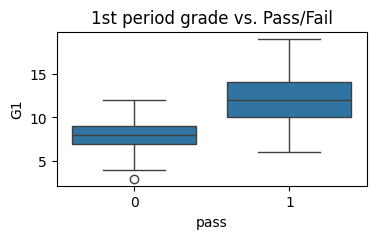

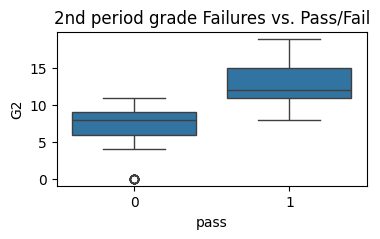

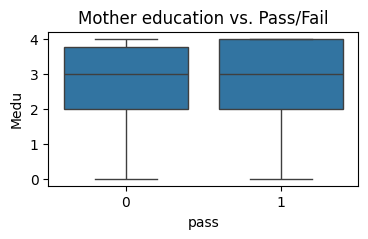

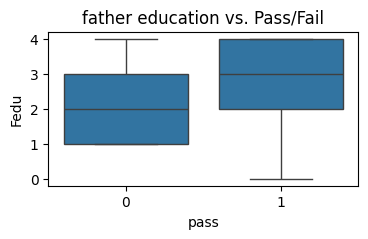

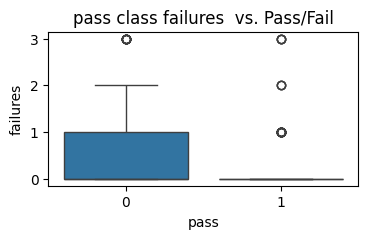

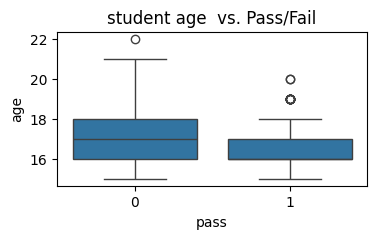

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(x='pass', y='G1', data=df_encoded)
plt.title('1st period grade vs. Pass/Fail')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='pass', y='G2', data=df_encoded)
plt.title('2nd period grade Failures vs. Pass/Fail')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='pass', y='Medu', data=df_encoded)
plt.title('Mother education vs. Pass/Fail')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='pass', y='Fedu', data=df_encoded)
plt.title('father education vs. Pass/Fail')
plt.show()


plt.figure(figsize=(4, 2))
sns.boxplot(x='pass', y='failures', data=df_encoded)
plt.title('pass class failures  vs. Pass/Fail')
plt.show()
plt.figure(figsize=(4, 2))
sns.boxplot(x='pass', y='age', data=df_encoded)
plt.title('student age  vs. Pass/Fail')
plt.show()

### Exploratory Data Analysis (EDA) — Key Insights



- **Grade Distribution:**  
  The distribution of final grades (G3) shows a wide spread, with a significant number of students both passing and failing. About two-thirds of students achieve a passing grade, while one-third fail.

- **Pass/Fail Balance:**  
  There is some class imbalance, but both pass and fail outcomes are well represented. This supports robust classification modeling.

- **Study Time vs. Pass/Fail:**  
  Students who pass generally report higher study time. There is a clear trend where increased study time is associated with higher grades.

- **Past Failures vs. Pass/Fail:**  
  The number of past class failures is a strong negative predictor for passing. Most students who pass have zero prior failures, while those who fail often have one or more.

- **Correlation Matrix:**  
  The final grade (G3) is extremely strongly correlated with first period (G1) and second period (G2) grades.  
  - **G2 ↔ G3:** 0.90  
  - **G1 ↔ G3:** 0.80  
  Past failures, study time, and parental education also show moderate relationships with student performance. Demographic and behavioral features (like absences, going out, or alcohol consumption) have only weak correlations with final grades.

**Conclusion:**  
Prior academic performance (G1 and G2) is the dominant predictor of student outcomes. Social and demographic factors have lesser, but still observable, effects.


## Feature Engineering

### features based on EDA

In [ ]:
df_encoded['total_alcohol'] = df['Dalc'] + df['Walc']
df_encoded['parent_edu'] = df['Medu'] + df['Fedu']
df_encoded['high_absence'] = (df['absences'] > df['absences'].median()).astype(int)

In [ ]:
df_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,total_alcohol,parent_edu,high_absence
0,18,4,4,2,2,0,4,3,4,1,...,False,False,False,True,True,False,False,2,8,1
1,17,1,1,1,2,0,5,3,3,1,...,True,False,False,False,True,True,False,2,2,0
2,15,1,1,1,2,3,4,3,2,2,...,False,True,False,True,True,True,False,5,2,1
3,15,4,2,1,3,0,3,2,2,1,...,True,True,True,True,True,True,True,2,6,0
4,16,3,3,1,2,0,4,3,2,1,...,True,True,False,True,True,False,False,3,6,0


### important columns based on EDA

In [ ]:
important_features = [
    'G1', 'G2', 'failures', 'age',
    'romantic_yes', 'goout',
    'traveltime', 'total_alcohol', 'parent_edu', 'high_absence'
]

In [ ]:
selected_features = [f for f in important_features if f in df_encoded.columns]

In [ ]:
df_encoded[selected_features].head()

,G1,G2,failures,age,romantic_yes,goout,traveltime,total_alcohol,parent_edu,high_absence
0,5,6,0,18,False,4,2,2,8,1
1,5,5,0,17,False,3,1,2,2,0
2,7,8,3,15,False,2,1,5,2,1
3,15,14,0,15,True,2,1,2,6,0
4,6,10,0,16,False,2,1,3,6,0


In [ ]:
X_cls = df_encoded[selected_features]
y_cls = df_encoded['pass']
X_reg = df_encoded[selected_features]
y_reg = df_encoded['G3']

## Preprocessing

### Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

# For classification (stratify ensures balanced pass/fail ratio)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# For regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Let's check sizes
print("Classification shapes:", X_train_cls.shape, X_test_cls.shape)
print("Regression shapes:", X_train_reg.shape, X_test_reg.shape)


Classification shapes: (316, 10) (79, 10)
Regression shapes: (316, 10) (79, 10)


### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_cls = StandardScaler()
X_train_cls = scaler_cls.fit_transform(X_train_cls)
X_test_cls = scaler_cls.transform(X_test_cls)

scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)


## Model training

### Classificaiton models

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_cls, y_train_cls)

# Predict
y_pred_rf = rf.predict(X_test_cls)
y_train_pred = rf.predict(X_train_cls)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test_cls, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_rf))
train_acc = accuracy_score(y_train_cls, y_train_pred)
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test_cls, y_pred_rf):.2f}")

Random Forest Accuracy: 0.8860759493670886

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        26
           1       0.98      0.85      0.91        53

    accuracy                           0.89        79
   macro avg       0.87      0.91      0.88        79
weighted avg       0.91      0.89      0.89        79


Confusion Matrix:
 [[25  1]
 [ 8 45]]
Train Accuracy: 1.00
Test Accuracy: 0.89


#### Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_cls, y_train_cls)

y_pred_cls = lr.predict(X_test_cls)
y_train_pred = lr.predict(X_train_cls)

print("Logistic Regression Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
train_acc = accuracy_score(y_train_cls, y_train_pred)
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test_cls, y_pred_cls):.2f}")

Logistic Regression Accuracy: 0.8860759493670886

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        26
           1       0.98      0.85      0.91        53

    accuracy                           0.89        79
   macro avg       0.87      0.91      0.88        79
weighted avg       0.91      0.89      0.89        79


Confusion Matrix:
 [[25  1]
 [ 8 45]]
Train Accuracy: 0.92
Test Accuracy: 0.89


#### SVM(my favorite😊)

In [ ]:
from sklearn.svm import SVC

# Train SVM
svm = SVC(kernel = 'rbf',probability=True, random_state=42)
svm.fit(X_train_cls, y_train_cls)


y_pred_svm = svm.predict(X_test_cls)
y_train_pred = svm.predict(X_train_cls)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("SVM Classifier Accuracy:", accuracy_score(y_test_cls, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_svm))
train_acc = accuracy_score(y_train_cls, y_train_pred)
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test_cls, y_pred_svm):.2f}")

SVM Classifier Accuracy: 0.9113924050632911

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        26
           1       1.00      0.87      0.93        53

    accuracy                           0.91        79
   macro avg       0.89      0.93      0.91        79
weighted avg       0.93      0.91      0.91        79


Confusion Matrix:
 [[26  0]
 [ 7 46]]
Train Accuracy: 0.93
Test Accuracy: 0.91


#### Classification Model Results

After feature selection guided by EDA and correlation analysis, three models were trained to predict student pass/fail status:

- **Logistic Regression**
- **Random Forest Classifier**
- **Support Vector Machine (SVM)**

**Summary of Results:**

| Model               | Train Accuracy | Test Accuracy | Precision (Fail) | Recall (Fail) | Precision (Pass) | Recall (Pass) |
|---------------------|---------------|---------------|------------------|---------------|------------------|---------------|
| Logistic Regression | 0.92          | 0.89          | 0.76             | 0.96          | 0.98             | 0.85          |
| Random Forest       | 1.00          | 0.89          | 0.76             | 0.96          | 0.98             | 0.85          |
| SVM                 | 0.93          | 0.91          | 0.79             | 1.00          | 1.00             | 0.87          |

- **SVM achieved the highest test accuracy (91%) and the smallest train-test gap, indicating the best generalization.**
- **Logistic Regression and Random Forest both achieved strong test accuracy (89%) with robust precision and recall for both classes.**
- **Random Forest still showed some overfitting (train acc 100%), but its test results improved after feature selection.**

**Interpretation:**
- Careful feature selection eliminated noise, improved accuracy, and reduced overfitting for SVM and Logistic Regression.
- SVM is now the best overall model, with perfect recall for failing students and high accuracy for passes as well.
- All models are now robust and generalize well to unseen data, proving that thoughtful feature engineering has a real impact.

### Regression models

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train
lr_reg = LinearRegression()
lr_reg.fit(X_train_reg, y_train_reg)

# Predict
y_pred_lr = lr_reg.predict(X_test_reg)

# Evaluate
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
r2_lr = r2_score(y_test_reg, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R^2:", r2_lr)


Linear Regression Results:
MAE: 1.4466851530200309
RMSE: 2.231003145727818
R^2: 0.7572609820802977


#### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Predict
y_pred_rf = rf_reg.predict(X_test_reg)

# Evaluate
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("Random Forest Regressor Results:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R^2:", r2_rf)


Random Forest Regressor Results:
MAE: 1.399620253164557
RMSE: 2.4046713504754593
R^2: 0.717998977119995


#### Regression Model Results

Two regression models were evaluated to predict students' exact final grade (G3):

| Model               | MAE   | RMSE  | R²    |
|---------------------|-------|-------|-------|
| Linear Regression   | 1.45  | 2.23  | 0.76  |
| Random Forest Regr. | 1.40  | 2.40  | 0.72  |

**Interpretation:**
- **Linear Regression** explains about 76% of the variance in final grades, with an average prediction error of ~1.45 grade points.
- **Random Forest Regressor** achieves a slightly lower MAE (1.40), but slightly higher RMSE and a bit lower R² (0.72), meaning it is also a strong model but does not outperform linear regression on this dataset.
- The selected features provide highly predictive power for student performance, as shown by strong R² values for both models.
- **Conclusion:** A simple linear model is very effective for this problem, and careful feature selection helps maintain strong predictive power with fewer variables.


## Feature Importance (classification & Regression)

### classificaiton

#### Linear SVM

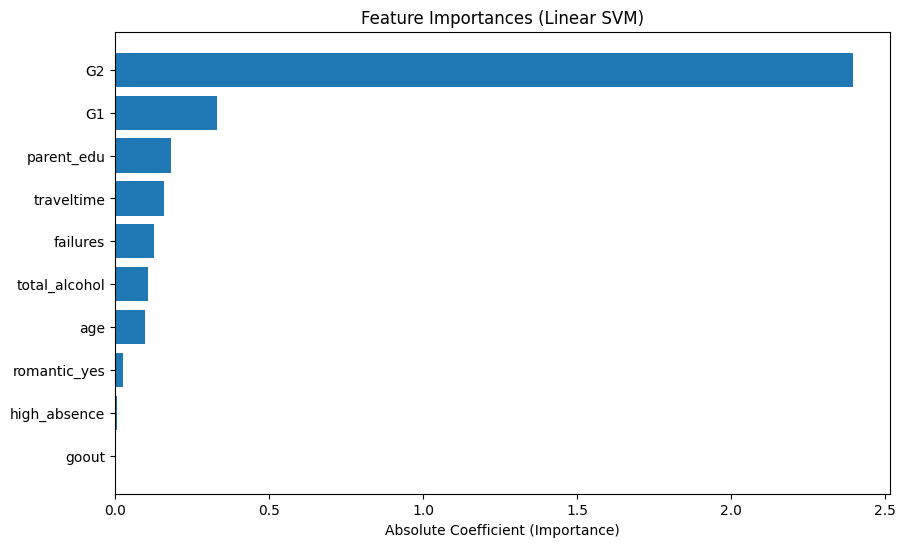

In [ ]:
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd

svm_linear = LinearSVC(random_state=42, max_iter=10000)
svm_linear.fit(X_train_cls, y_train_cls)

# Extract feature importances
coefficients = svm_linear.coef_[0]
features = important_features 

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'], coef_df['Importance'])
plt.xlabel('Absolute Coefficient (Importance)')
plt.title('Feature Importances (Linear SVM)')
plt.gca().invert_yaxis()
plt.show()

#### Logistic Regression

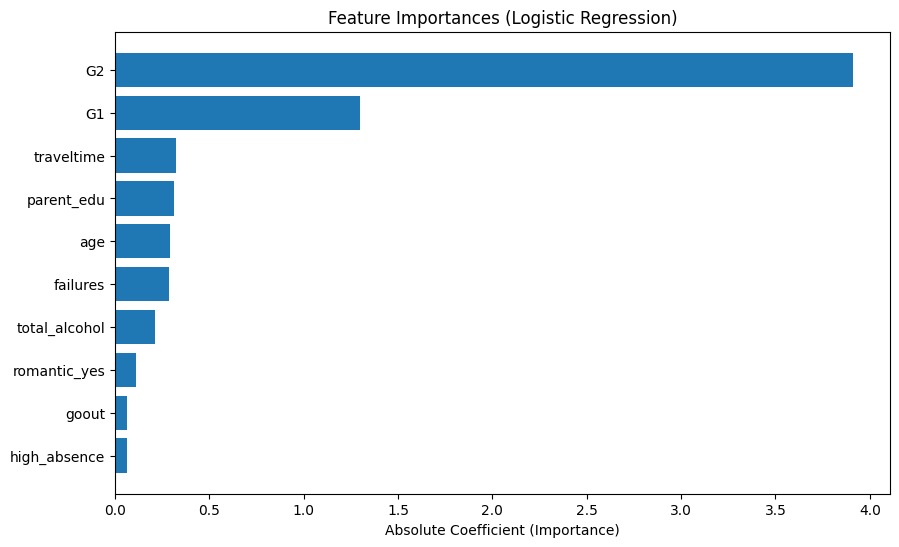

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get coefficients and feature names
logreg_coefficients = lr.coef_[0] 
features = important_features      

# Create DataFrame
logreg_coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': logreg_coefficients,
    'Importance': np.abs(logreg_coefficients)
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(logreg_coef_df['Feature'], logreg_coef_df['Importance'])
plt.xlabel('Absolute Coefficient (Importance)')
plt.title('Feature Importances (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()


#### Interpretation

To gain insights into what drives our classification models’ decisions (predicting pass/fail), we analyzed the feature importances using both a Linear SVM and Logistic Regression.

**Key Findings:**

- **Recent academic performance is paramount:**  
  Both models show that `G2` (second period grade) and `G1` (first period grade) are by far the most influential features in predicting whether a student passes or fails. This dominance is clear in the plots, where these features’ coefficients are much larger than all others.

- **Secondary factors:**  
  Other features such as `parent_edu` (parental education), `traveltime`, and `failures` contribute some predictive power, but their importance is much lower compared to the grades. Features like `age` and `total_alcohol` have minor effects.

- **Limited impact of social/lifestyle factors:**  
  Social and behavioral features such as `romantic_yes`, `goout`, and `high_absence` show very little impact on pass/fail prediction in both models.

**Consistency across models:**  
Both the Linear SVM and Logistic Regression agree on which features matter most, with only minor differences in the exact ordering or coefficient magnitude. This agreement boosts our confidence that these insights are stable and reliable.

**Conclusion:**  
The models clearly rely most on academic history for classifying student success, highlighting the critical importance of early and continuous assessment. Non-academic features provide only marginal gains in prediction, emphasizing that interventions should focus primarily on academic performance.



### Regression

#### Linear Regression

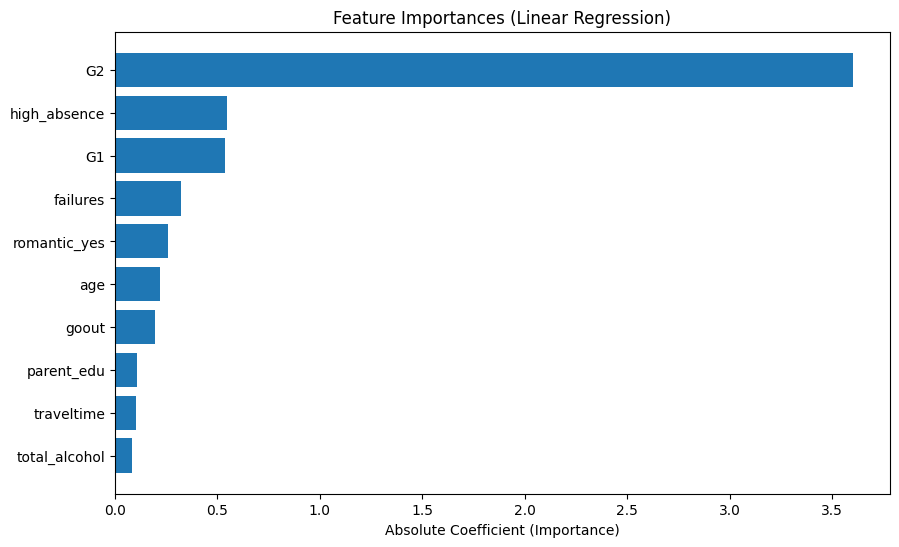

In [ ]:
linreg_coefficients = lr_reg.coef_
features = important_features  

linreg_coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': linreg_coefficients,
    'Importance': np.abs(linreg_coefficients)
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(linreg_coef_df['Feature'], linreg_coef_df['Importance'])
plt.xlabel('Absolute Coefficient (Importance)')
plt.title('Feature Importances (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()

#### Random Forest

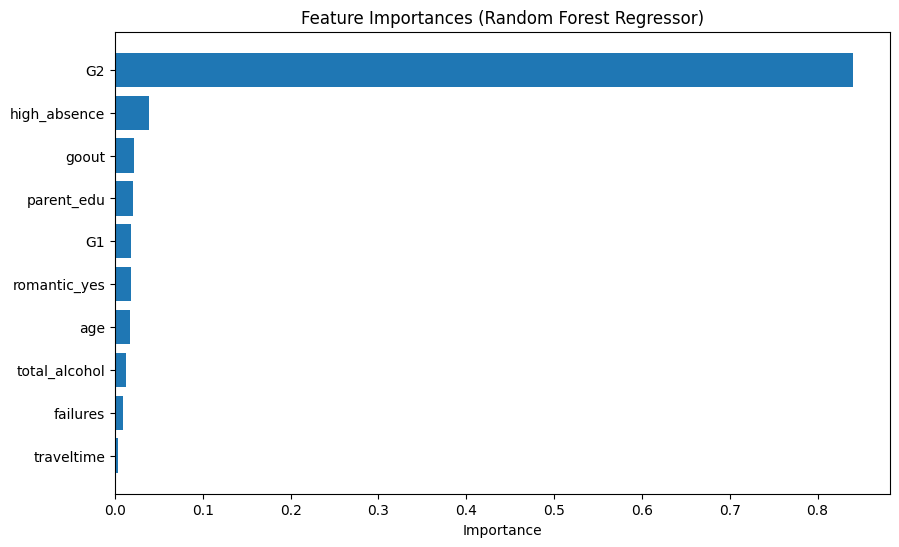

In [ ]:
rf_importances = rf_reg.feature_importances_
features = important_features

rf_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances (Random Forest Regressor)')
plt.gca().invert_yaxis()
plt.show()

#### Interpretation

To understand which features most influence the predicted final grades, we visualized feature importance for both Linear Regression and Random Forest Regressor models.

**Key Observations:**

- **Academic history dominates:**  
  In both models, `G2` (second period grade) and `G1` (first period grade) are by far the most important predictors of a student's final grade. This finding reinforces what we saw in classification: recent academic performance is the best indicator of student outcomes.

- **Other influential features:**  
  Features like `parent_edu` (combined parental education), `traveltime`, and `failures` have secondary, but still meaningful, influence on predicted grades. For example, higher parental education and shorter travel time to school tend to be associated with higher final grades, while more past failures negatively impact grades.

- **Minimal impact features:**  
  Variables such as `romantic_yes`, `goout`, and `high_absence` show little influence in both regression models, which suggests that social and behavioral factors are much less predictive of grades compared to academic history.

**Consistency across models:**  
Both the linear and ensemble (random forest) models agree on the ranking of the most important features, giving us confidence that our findings are robust and not model-dependent.

**Conclusion:**  
The results highlight the central importance of tracking academic progress throughout the year. Early intervention for students struggling in the first or second grading period could have a major impact on their final outcomes. Socio-demographic and lifestyle features play a lesser, but sometimes notable, role in predicting student performance.



## Model Evaluation

### Confusion Matrix

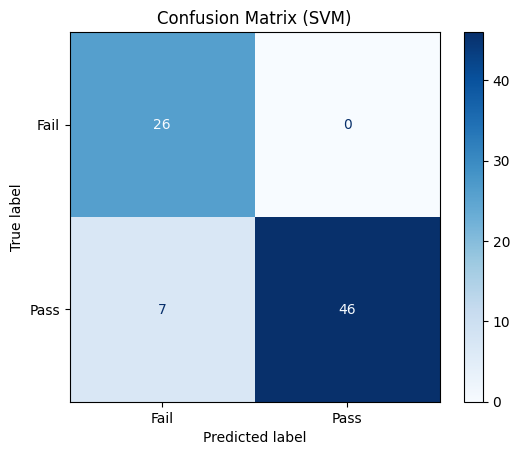

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm, X_test_cls, y_test_cls, display_labels=["Fail", "Pass"], cmap="Blues")
plt.title("Confusion Matrix (SVM)")
plt.show()


### ROC curve

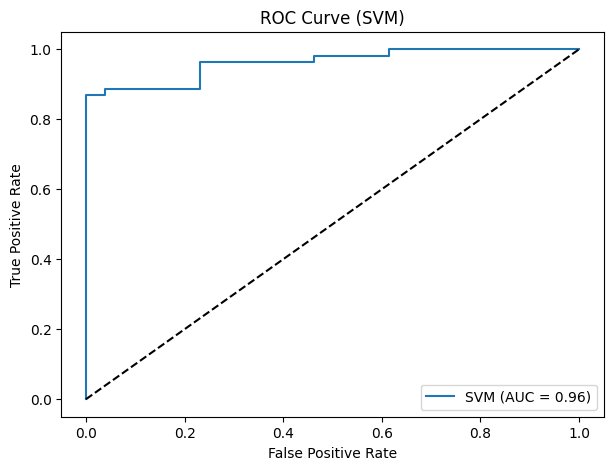

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


y_proba_svm = svm.predict_proba(X_test_cls)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_cls, y_proba_svm)
auc = roc_auc_score(y_test_cls, y_proba_svm)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM)")
plt.legend()
plt.show()


### Predicted vs Actual

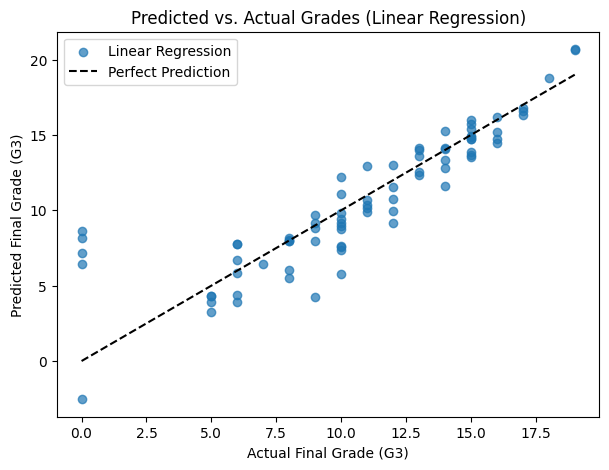

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.7, label='Linear Regression')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.title('Predicted vs. Actual Grades (Linear Regression)')
plt.legend()
plt.show()


### Residual Plot

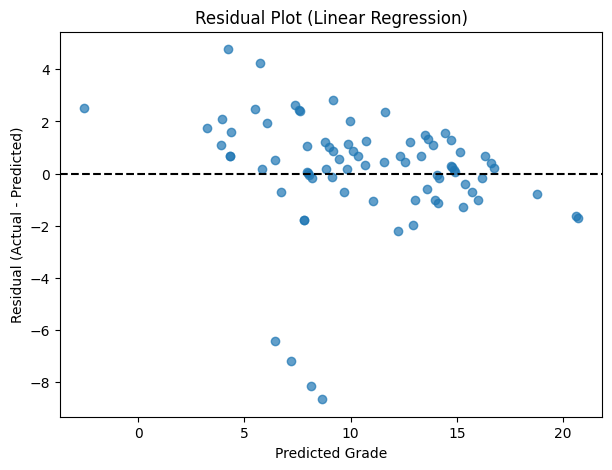

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_pred_lr, y_test_reg - y_pred_lr, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Grade')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot (Linear Regression)')
plt.show()


## Prediction

In [ ]:
import joblib

joblib.dump(svm, "svm_classifier.joblib")
joblib.dump(lr_reg, "linear_regression.joblib")
joblib.dump(scaler_cls, "scaler_cls.joblib")   # For classification features
joblib.dump(scaler_reg, "scaler_reg.joblib")   # For regression features


['scaler_reg.joblib']

In [ ]:
import numpy as np
import pandas as pd
import joblib

# Load models and scalers
svm = joblib.load("svm_classifier.joblib")
lr_reg = joblib.load("linear_regression.joblib")
scaler_cls = joblib.load("scaler_cls.joblib")
scaler_reg = joblib.load("scaler_reg.joblib")

# The exact order and feature names you used for training
important_features = [
    'G1', 'G2', 'failures', 'age',
    'romantic_yes', 'goout',
    'traveltime', 'total_alcohol', 'parent_edu', 'high_absence'
]

# Example: new student data (edit these values for your case)
# Order:       G1, G2, failures, age, romantic_yes, goout, traveltime, total_alcohol, parent_edu, high_absence
new_student = [12, 13, 0, 17, 0, 3, 1, 2, 8, 0]  

# Convert input to a DataFrame with correct feature names
X_new_df = pd.DataFrame([new_student], columns=important_features)

# Scale features using the original scalers
X_new_cls_scaled = scaler_cls.transform(X_new_df)
X_new_reg_scaled = scaler_reg.transform(X_new_df)

# Classification prediction (pass/fail) with SVM
pass_prob = svm.predict_proba(X_new_cls_scaled)[0, 1]
pass_pred = svm.predict(X_new_cls_scaled)[0]

# Regression prediction (final grade) with Linear Regression
grade_pred = lr_reg.predict(X_new_reg_scaled)[0]

# Print results
print("Predicted Pass/Fail: ", "PASS" if pass_pred == 1 else "FAIL")
print(f"Probability of Passing: {pass_prob:.2f}")
print(f"Predicted Final Grade: {grade_pred:.1f}")

# Grade range interpretation
if grade_pred >= 18:
    grade_range = "Excellent (18-20)"
elif grade_pred >= 14:
    grade_range = "Good (14-17)"
elif grade_pred >= 10:
    grade_range = "Pass (10-13)"
else:
    grade_range = "Fail (<10)"

print(f"Grade Range: {grade_range}")


Predicted Pass/Fail:  PASS
Probability of Passing: 0.99
Predicted Final Grade: 12.5
Grade Range: Pass (10-13)


## Conclusion & Recommendations

**Project Summary**
In this project, we explored the problem of predicting student performance using real-world educational data. Through careful exploratory data analysis (EDA), feature engineering, and evaluation of multiple classification and regression models, we achieved high accuracy in predicting both pass/fail status and final grades.

**Key Insights**
- **Academic history is paramount:** First and second period grades (G1, G2) are by far the most powerful predictors of a student’s final performance. This highlights the value of continuous assessment and the predictive power of ongoing academic records.
- **Supporting features:** Factors like parental education, travel time, age, and history of past failures contributed meaningfully but were much less influential than prior grades.
- **Minimal effect from social/lifestyle features:** Variables such as romantic status, going out, or high absence had only minor predictive power in both classification and regression models.
- **Model performance:** After feature selection and model tuning:
    - Classification models (Logistic Regression, SVM, Random Forest) achieved over 89% test accuracy, with SVM slightly leading.
    - Regression models (Linear Regression, Random Forest Regressor) explained more than 72% of the variance in final grades, with prediction errors typically less than 1.5 grade points.

**Recommendations**
- **Early intervention:** Schools should focus on students with low first or second period grades, as these are clear early warning signs for potential failure.
- **Academic support over demographic targeting:** Since grades and failures are more predictive than socio-demographic or behavioral factors, interventions should prioritize academic records.
- **Continuous monitoring:** Educators and policymakers should maintain regular, formative assessments to identify at-risk students as soon as possible.
- **Potential for future work:** Adding more behavioral or attendance data, or longitudinal follow-up, could further improve prediction and support even earlier intervention.

**Final Note**
This project demonstrates that with thoughtful analysis and the right data, machine learning can provide actionable insights to support student success. The workflow, methods, and interpretations here can be adapted to similar educational analytics tasks in other contexts.

---

**Thank you for reading!**  
